In [6]:
import sys

sys.path

['/home/jonas/dev/private/mc-sde/demo',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/jonas/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/jonas/.local/lib/python3.8/site-packages/IPython/extensions',
 '/home/jonas/.ipython']

Bcasting
Gathered
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.6/site-packages/sdepy-0.0.1-py3.6.egg/sdepy/pdf/histogram.py:66: RuntimeWarning: invalid value encountered in double_scalars
  percentage_overlap = (i_ub - i_lb) / (s_ub - s_lb)


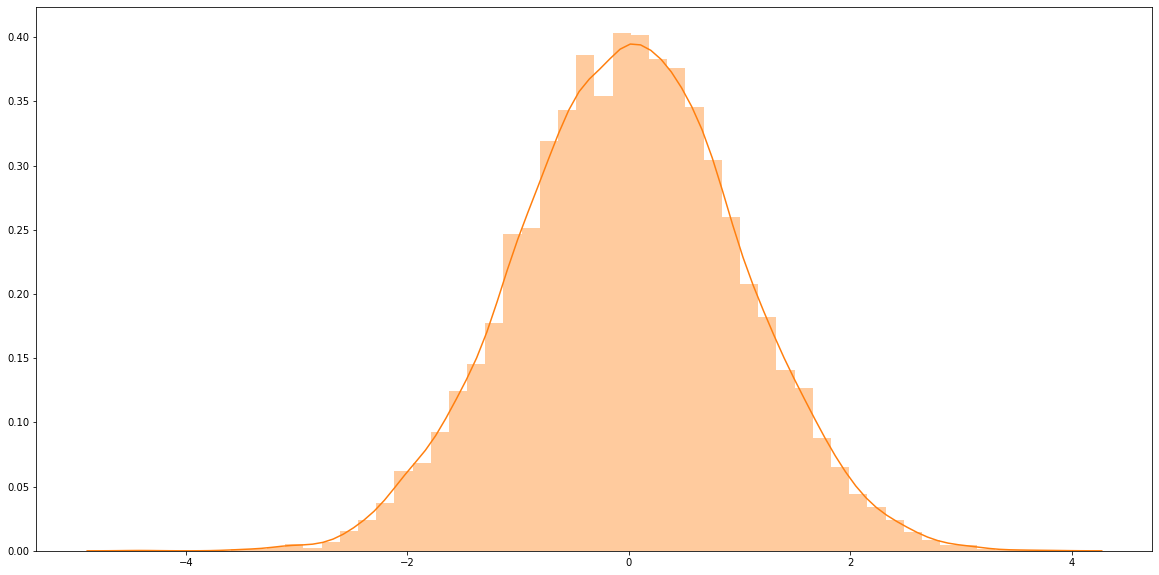

In [6]:
from sdepy.master import run
from sdepy.sde.ito import Ito1D
from sdepy.pdf.histogram import Simple1DHistogram
from sdepy.core import Job
import functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb




sde = Ito1D(particles=50000,
            x0=0.0,
            drift=functions.drift,
            diffusion=functions.diffusion,
            sigma=1,
            t0=0.0,
            dt=1e-2,
            T=1.0)

job = Job(
    sde=sde,
    pdf=Simple1DHistogram(bins=100),
    mode=Job.RAW
)

pdf = run(job, 2, parent=functions.__file__)

x = np.linspace(pdf.lower_bound, pdf.upper_bound, 1000)
y = pdf(x)

plt.figure(figsize=(20, 10))
plt.plot(x, y, label="Approximation")
sb.distplot(np.random.normal(0, 1, size=10000), label="True")
plt.show()
